In [26]:
%pip install joypy


Note: you may need to restart the kernel to use updated packages.


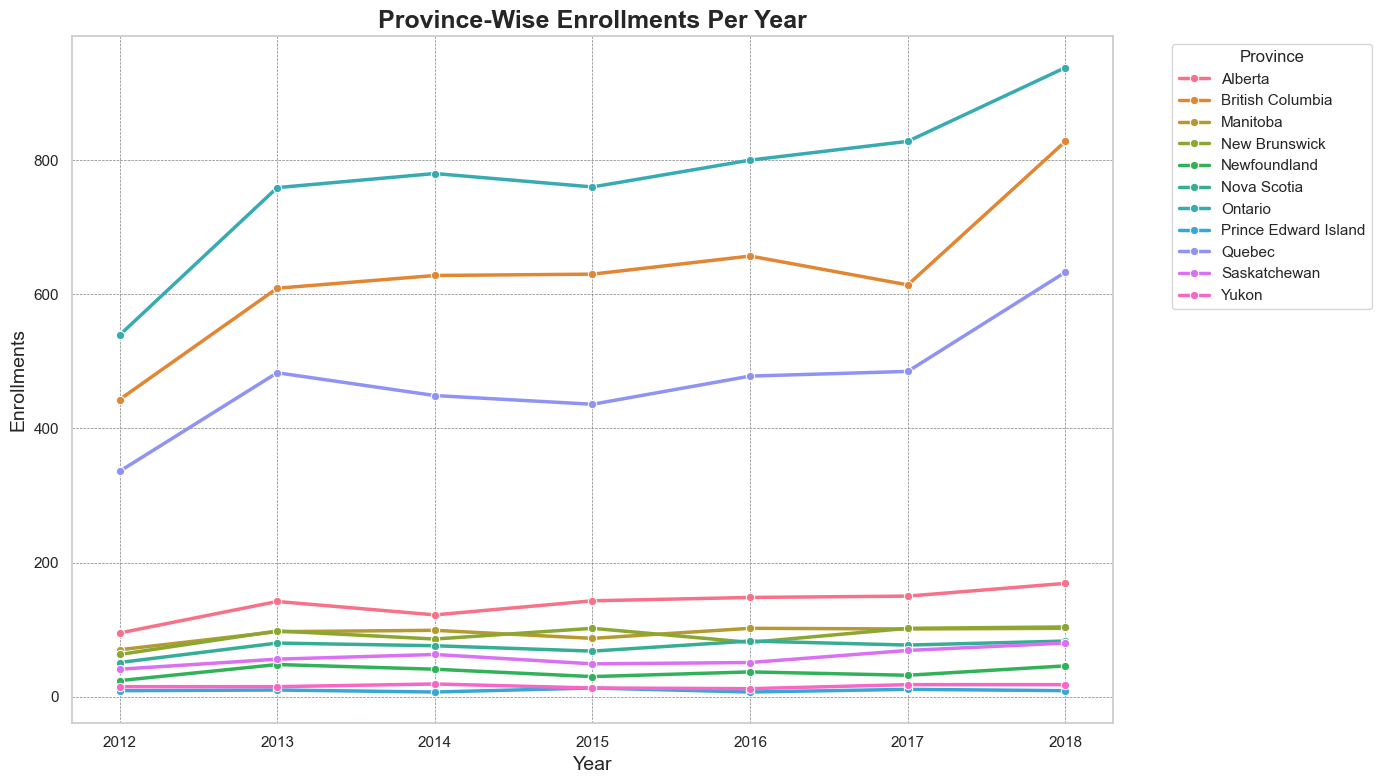

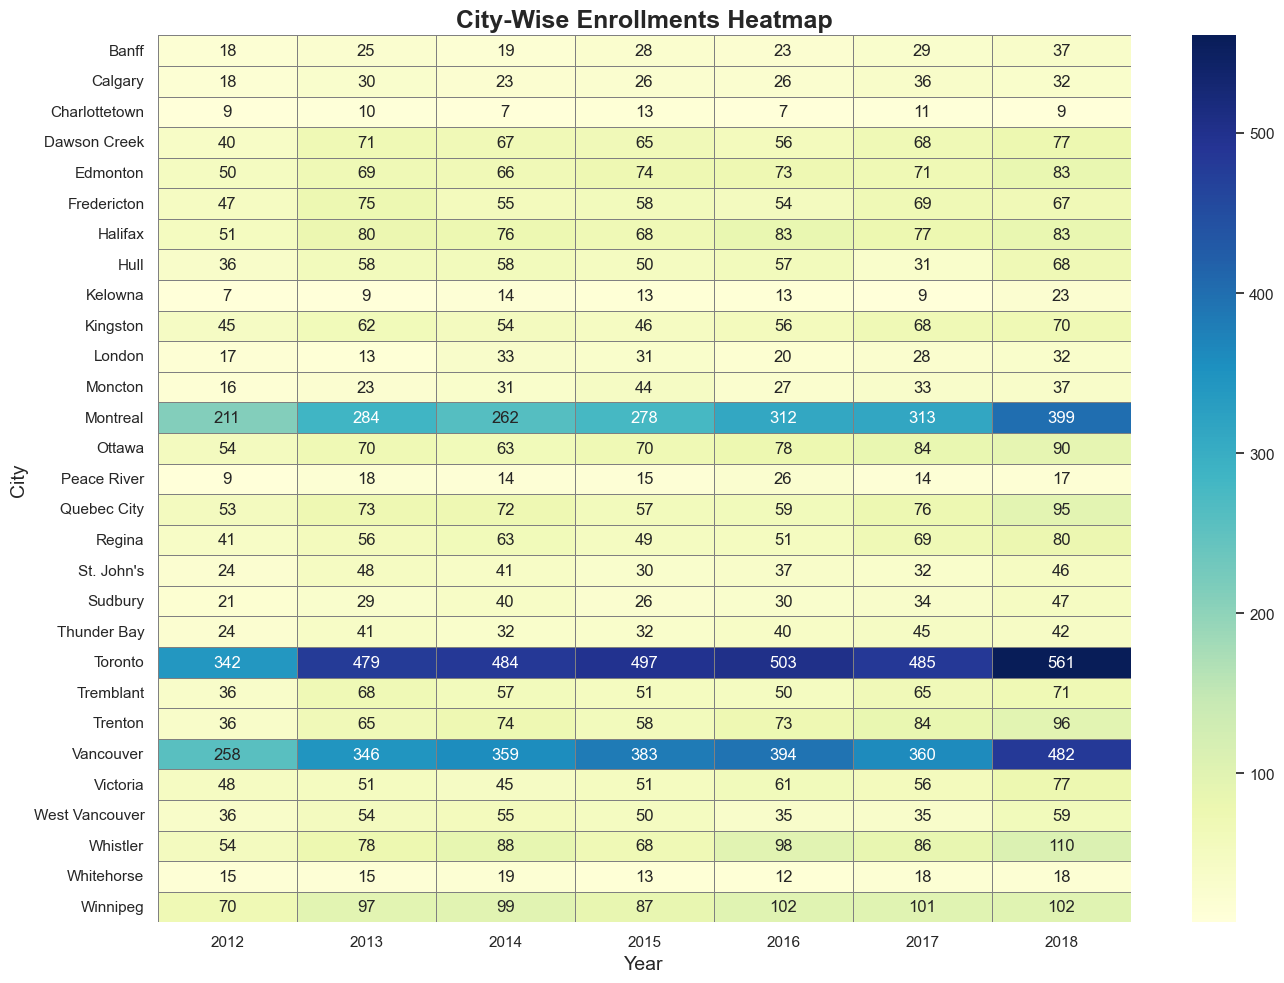

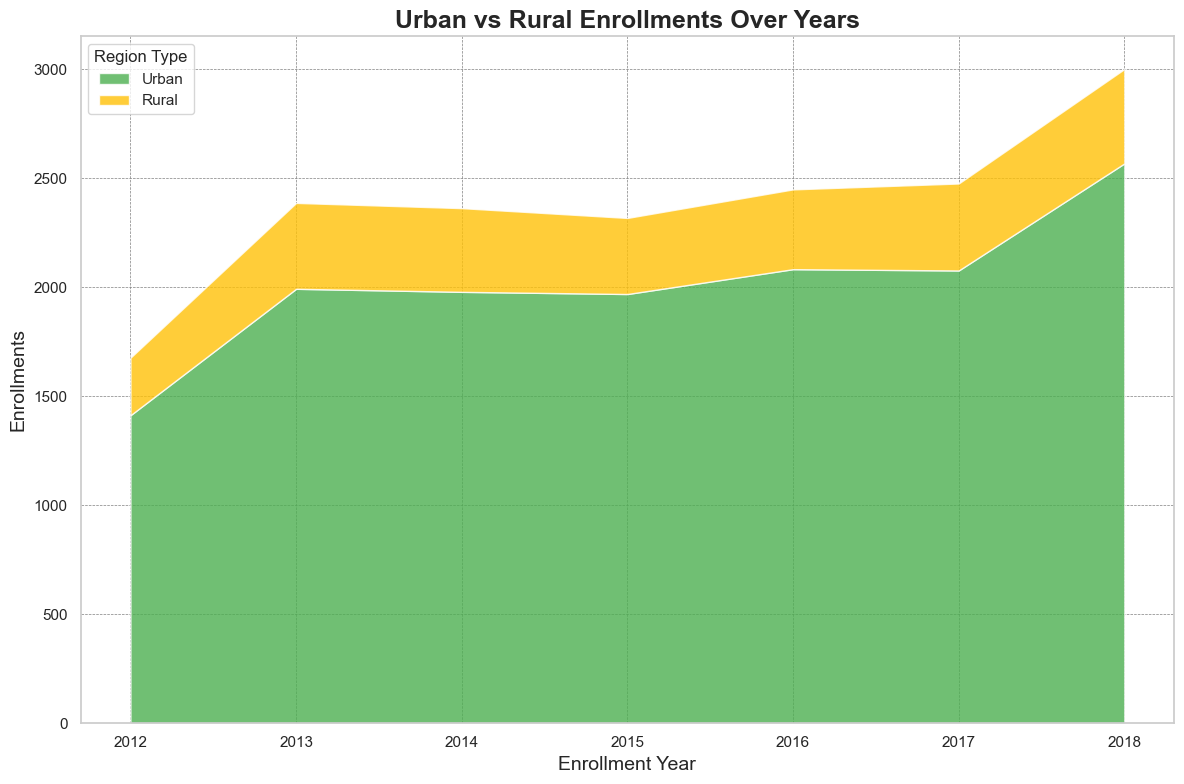

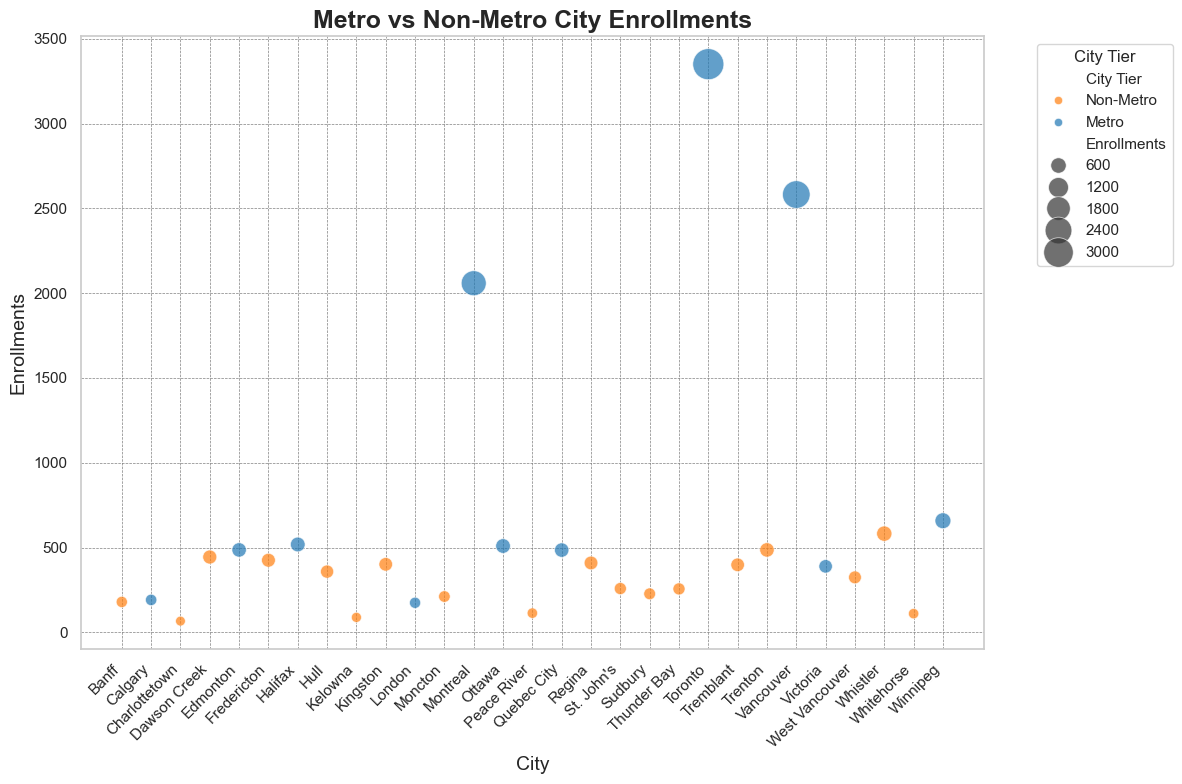

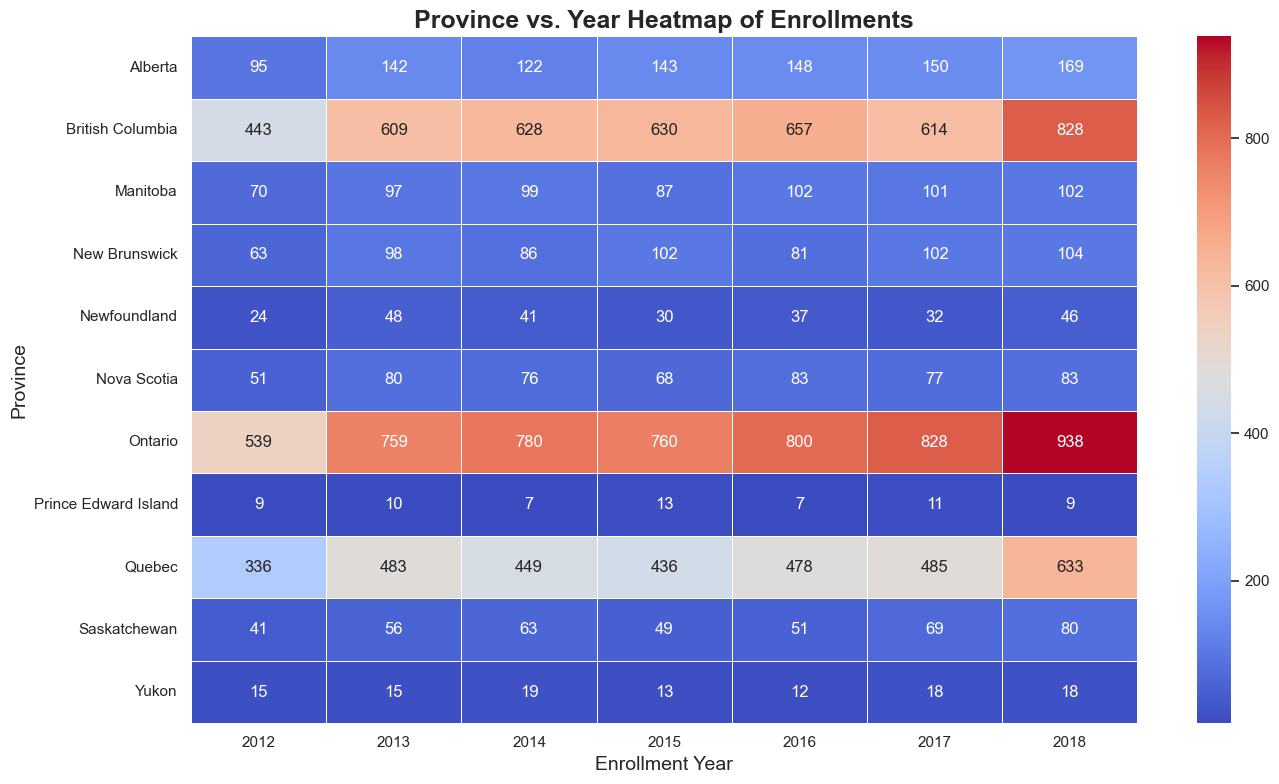

Analysis complete. Results saved as CSV files.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the loyalty history dataset
loyalty_history_path = '/Users/rishipatel/Desktop/Sem-5/DV/Ass-3/Updated_Customer_Loyalty_History.csv'

# Read the dataset
loyalty_history = pd.read_csv(loyalty_history_path)

# Extract year from enrollment date
loyalty_history['Enrollment Year'] = pd.to_datetime(loyalty_history['Enrollment Date']).dt.year

# Define metro and non-metro cities based on the provided list
metro_cities = [
    'Toronto', 'Edmonton', 'Vancouver', 'Montreal', 
    'Quebec City', 'Ottawa', 'Calgary', 'Winnipeg', 
    'Halifax', 'London', 'Victoria'
]

non_metro_cities = [
    'Hull', 'Whitehorse', 'Trenton', 'Dawson Creek', 'Fredericton', 
    'Tremblant', 'Thunder Bay', 'Whistler', 'Peace River', 
    'Sudbury', 'West Vancouver', 'Regina', 'Kelowna', 
    "St. John's", 'Kingston', 'Banff', 'Moncton', 'Charlottetown'
]

# Add a City Tier column
loyalty_history['City Tier'] = loyalty_history['City'].apply(
    lambda x: 'Metro' if x.strip().title() in [city.title() for city in metro_cities] else 
              ('Non-Metro' if x.strip().title() in [city.title() for city in non_metro_cities] else 'Unknown')
)

# Define urban and rural provinces
urban_provinces = ['Ontario', 'British Columbia', 'Quebec', 'Alberta']
rural_provinces = ['Saskatchewan', 'Manitoba', 'Newfoundland', 'Nova Scotia','Yukon','New Brunswick']

# Add a RegionType column
loyalty_history['RegionType'] = loyalty_history['Province'].apply(
    lambda x: 'Urban' if x in urban_provinces else ('Rural' if x in rural_provinces else 'Unknown')
)

# 1. Analyze per province enrollments
province_year_enrollments = loyalty_history.groupby(['Province', 'Enrollment Year'])['Loyalty Number'].count().reset_index()
province_year_enrollments.rename(columns={'Loyalty Number': 'Enrollments'}, inplace=True)

# 2. Divide province into urban and rural
region_year_enrollments = loyalty_history.groupby(['Province', 'RegionType', 'Enrollment Year'])['Loyalty Number'].count().reset_index()
region_year_enrollments.rename(columns={'Loyalty Number': 'Enrollments'}, inplace=True)

# 3. Analyze per city enrollments
city_year_enrollments = loyalty_history.groupby(['City', 'Enrollment Year'])['Loyalty Number'].count().reset_index()
city_year_enrollments.rename(columns={'Loyalty Number': 'Enrollments'}, inplace=True)

# 4. Analyze enrollments by City Tier
tier_year_enrollments = loyalty_history.groupby(['City Tier', 'Enrollment Year'])['Loyalty Number'].count().reset_index()
tier_year_enrollments.rename(columns={'Loyalty Number': 'Enrollments'}, inplace=True)

# Visualizations
sns.set_theme(style="whitegrid")

# 1. Province-wise enrollments over years
plt.figure(figsize=(14, 8))
sns.lineplot(data=province_year_enrollments, x='Enrollment Year', y='Enrollments', hue='Province', marker='o', linewidth=2.5)
plt.title('Province-Wise Enrollments Per Year', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Enrollments', fontsize=14)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# 2. City-wise enrollments heatmap
city_year_pivot = city_year_enrollments.pivot(index='City', columns='Enrollment Year', values='Enrollments').fillna(0)
plt.figure(figsize=(14, 10))
sns.heatmap(city_year_pivot, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5, linecolor='gray')
plt.title('City-Wise Enrollments Heatmap', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.tight_layout()
plt.show()


# Prepare data for stacked area chart
region_area_data = region_year_enrollments.groupby(['RegionType', 'Enrollment Year'])['Enrollments'].sum().reset_index()
region_area_pivot = region_area_data.pivot(index='Enrollment Year', columns='RegionType', values='Enrollments').fillna(0)

# Plot stacked area chart
plt.figure(figsize=(12, 8))
plt.stackplot(
    region_area_pivot.index, 
    region_area_pivot['Urban'], 
    region_area_pivot['Rural'], 
    labels=['Urban', 'Rural'], 
    colors=['#4CAF50', '#FFC107'], 
    alpha=0.8
)
plt.title('Urban vs Rural Enrollments Over Years', fontsize=18, fontweight='bold')
plt.xlabel('Enrollment Year', fontsize=14)
plt.ylabel('Enrollments', fontsize=14)
plt.legend(loc='upper left', title='Region Type')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# 4. City Tier enrollments over years
# Prepare data for cluster-based visualization
city_cluster_data = loyalty_history.groupby(['City', 'City Tier'])['Loyalty Number'].count().reset_index()
city_cluster_data.rename(columns={'Loyalty Number': 'Enrollments'}, inplace=True)

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=city_cluster_data, 
    x='City', 
    y='Enrollments', 
    hue='City Tier', 
    size='Enrollments', 
    sizes=(50, 500), 
    alpha=0.7, 
    palette={'Metro': '#1f77b4', 'Non-Metro': '#ff7f0e'}
)
plt.title('Metro vs Non-Metro City Enrollments', fontsize=18, fontweight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Enrollments', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='City Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Pivot for heatmap
province_year_heatmap = province_year_enrollments.pivot(index='Province', columns='Enrollment Year', values='Enrollments').fillna(0)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(province_year_heatmap, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title('Province vs. Year Heatmap of Enrollments', fontsize=18, fontweight='bold')
plt.xlabel('Enrollment Year', fontsize=14)
plt.ylabel('Province', fontsize=14)
plt.tight_layout()
plt.show()



# Save outputs to CSV files
province_year_enrollments.to_csv('/Users/rishipatel/Desktop/Sem-5/DV/Ass-3/Province_Year_Enrollments.csv', index=False)
region_year_enrollments.to_csv('/Users/rishipatel/Desktop/Sem-5/DV/Ass-3/Region_Year_Enrollments.csv', index=False)
city_year_enrollments.to_csv('/Users/rishipatel/Desktop/Sem-5/DV/Ass-3/City_Year_Enrollments.csv', index=False)
tier_year_enrollments.to_csv('/Users/rishipatel/Desktop/Sem-5/DV/Ass-3/Tier_Year_Enrollments.csv', index=False)

print("Analysis complete. Results saved as CSV files.")


<Figure size 1400x1000 with 0 Axes>

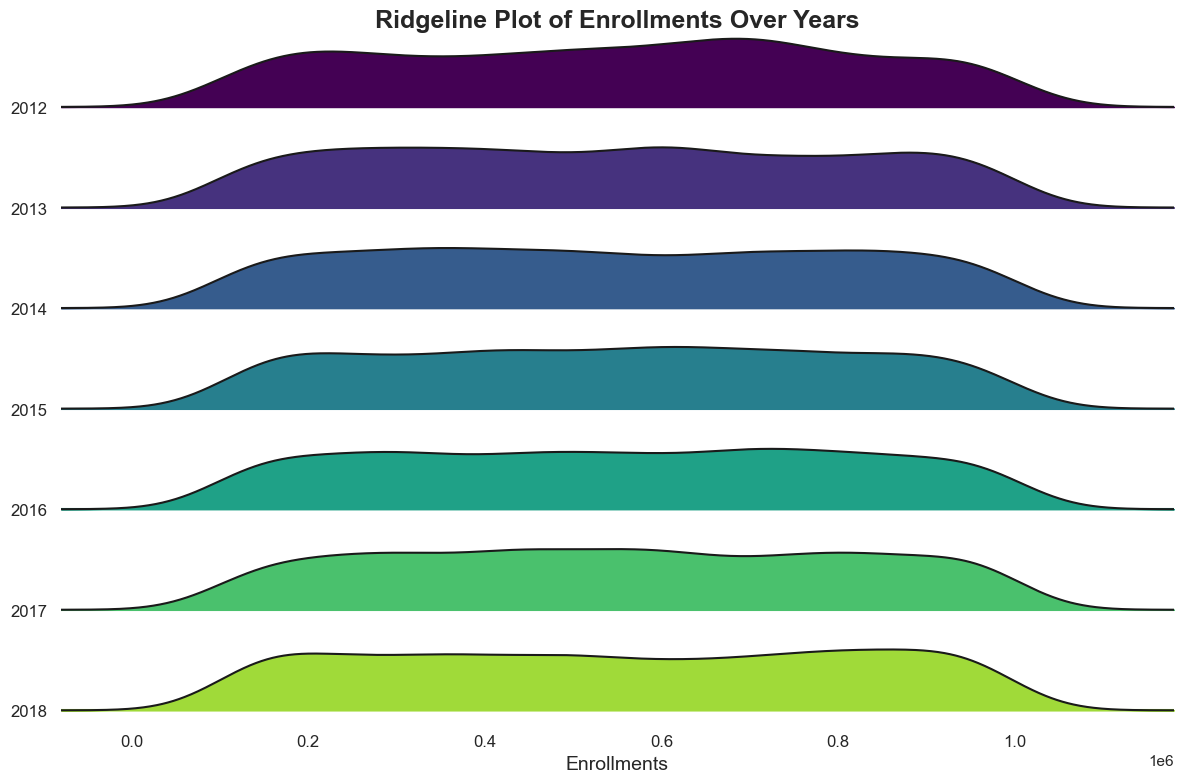

In [11]:
from joypy import joyplot

# Ridgeline plot for yearly enrollments per province
plt.figure(figsize=(14, 10))
joyplot(
    data=loyalty_history,
    by='Enrollment Year',
    column='Loyalty Number',
    overlap=0.7,
    colormap=plt.cm.viridis,
    figsize=(12, 8)
)
plt.title('Ridgeline Plot of Enrollments Over Years', fontsize=18, fontweight='bold')
plt.xlabel('Enrollments', fontsize=14)
plt.ylabel('Enrollment Year', fontsize=14)
plt.tight_layout()
plt.show()


In [12]:
%pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [13]:
%pip


Usage:   
  /opt/homebrew/Caskroom/miniconda/base/envs/ml/bin/python -m pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of

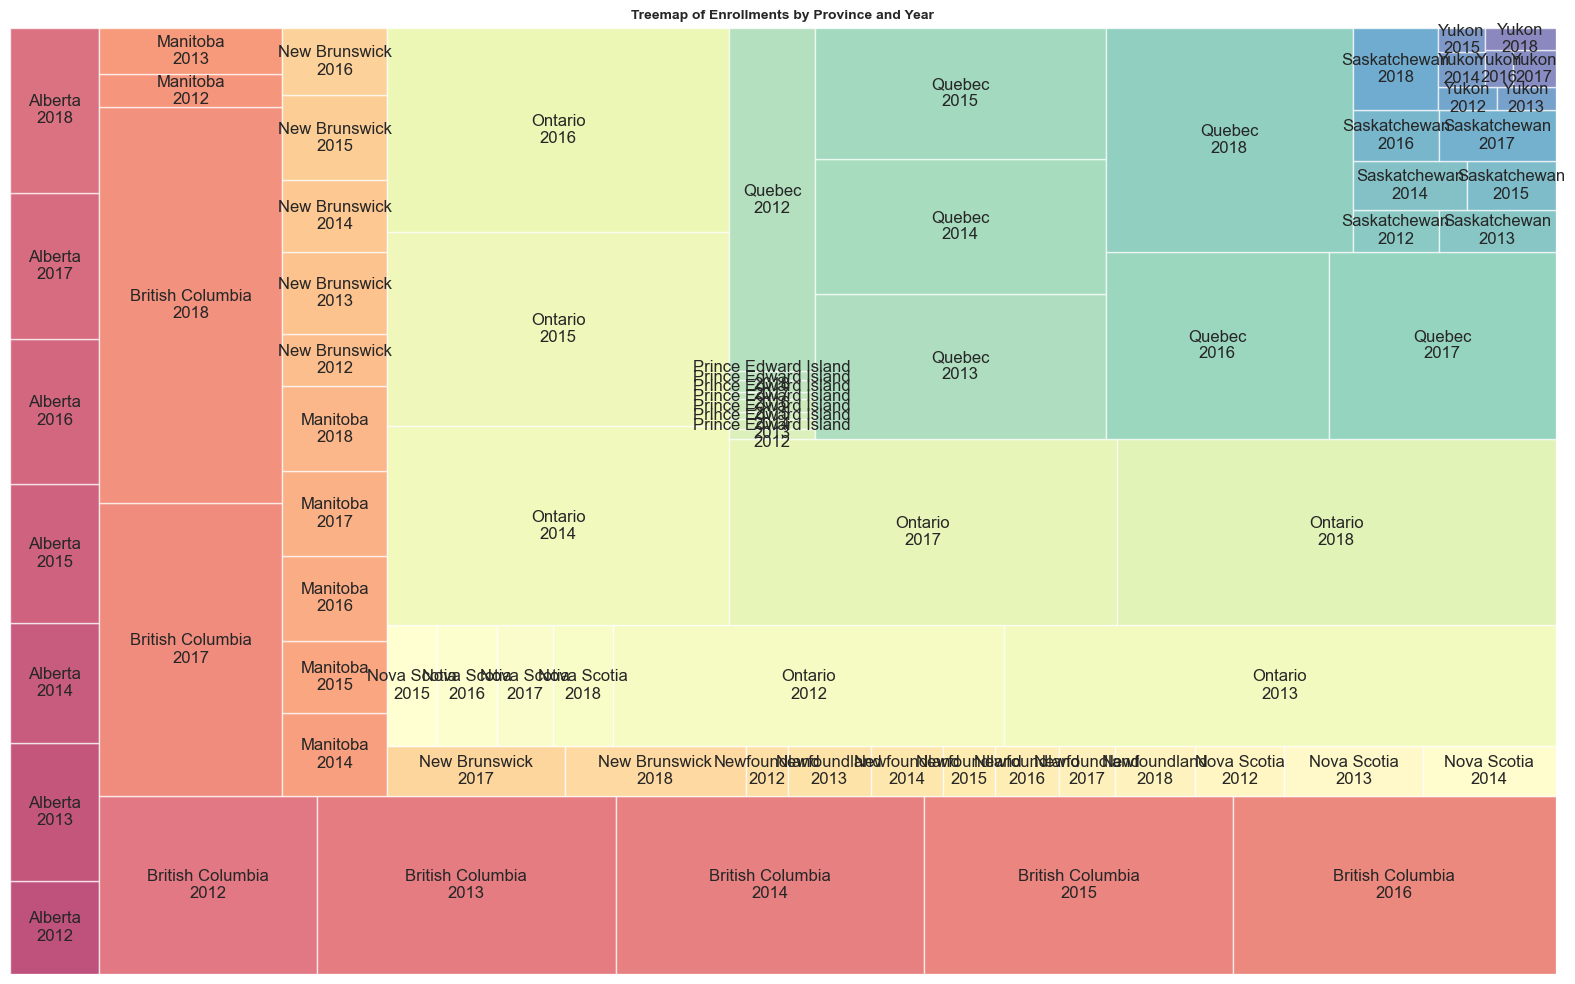

In [14]:
import squarify

# Prepare data for treemap
province_treemap_data = loyalty_history.groupby(['Province', 'Enrollment Year'])['Loyalty Number'].count().reset_index()
province_treemap_data.rename(columns={'Loyalty Number': 'Enrollments'}, inplace=True)
province_treemap_data['Label'] = province_treemap_data['Province'] + '\n' + province_treemap_data['Enrollment Year'].astype(str)

# Treemap plot
plt.figure(figsize=(16, 10))
squarify.plot(
    sizes=province_treemap_data['Enrollments'], 
    label=province_treemap_data['Label'], 
    color=sns.color_palette('Spectral', len(province_treemap_data)), 
    alpha=0.7
)
plt.title('Treemap of Enrollments by Province and Year', fontsize=10, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


In [1]:
%pip install squarify

Note: you may need to restart the kernel to use updated packages.


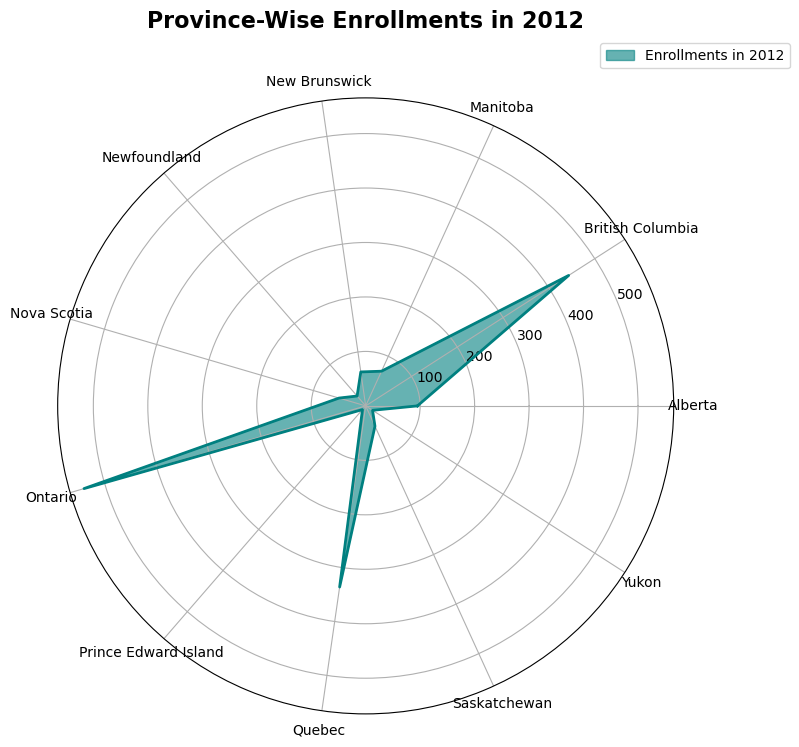

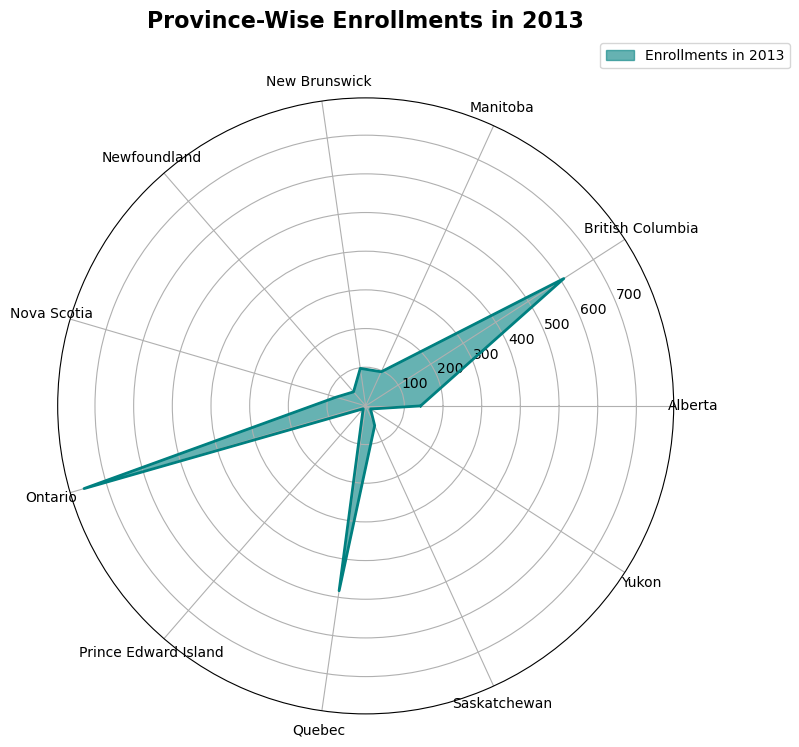

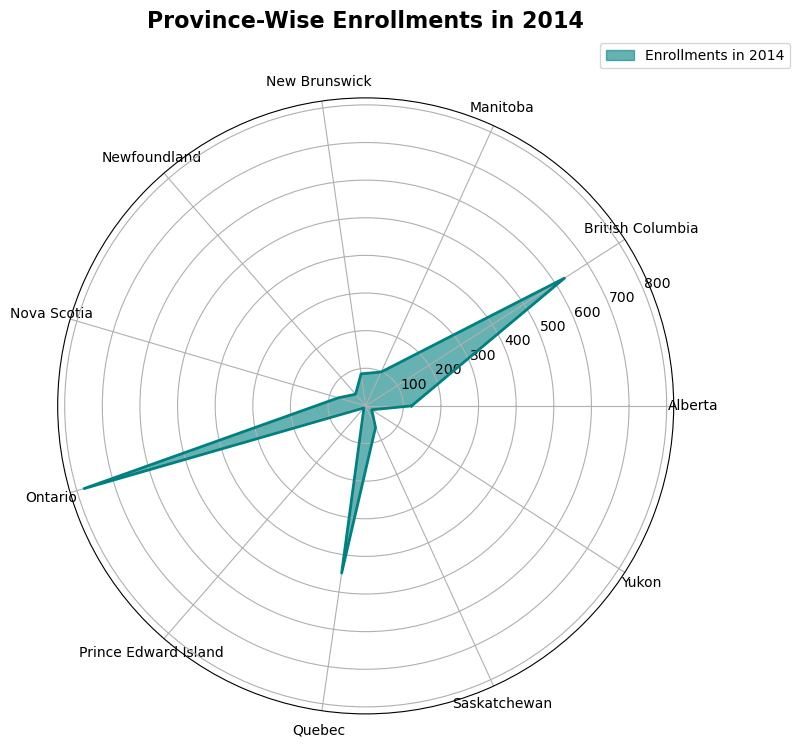

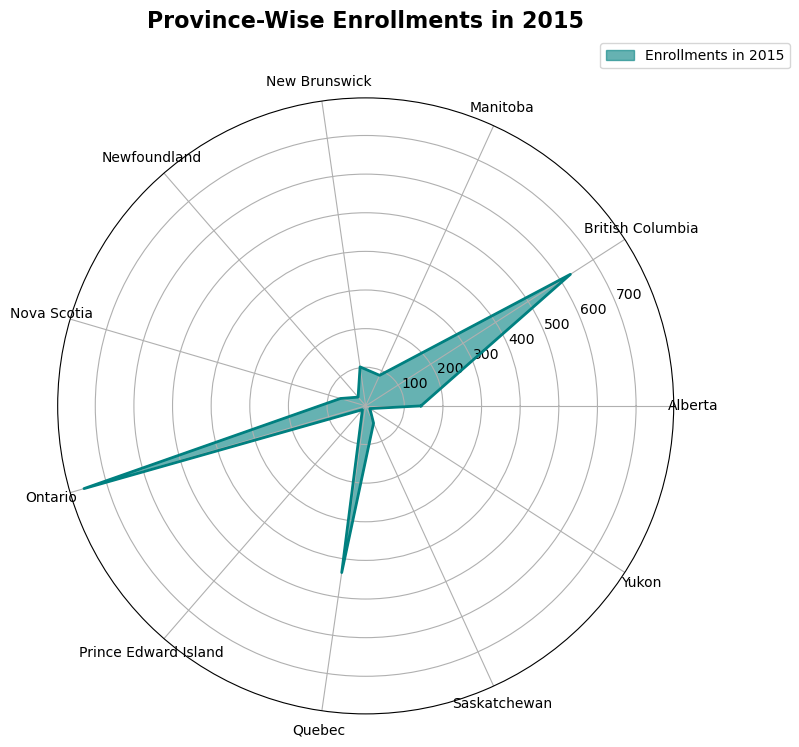

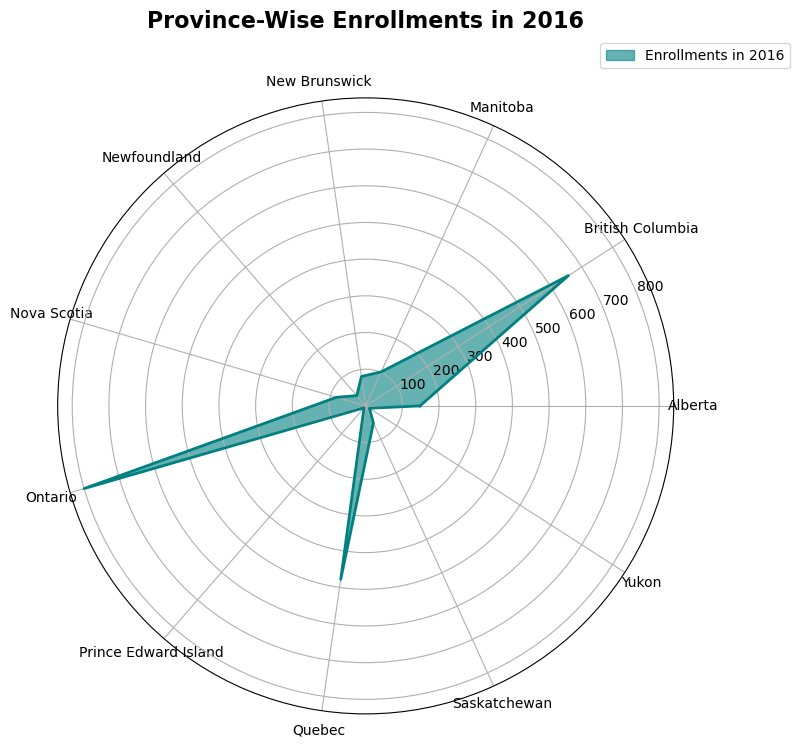

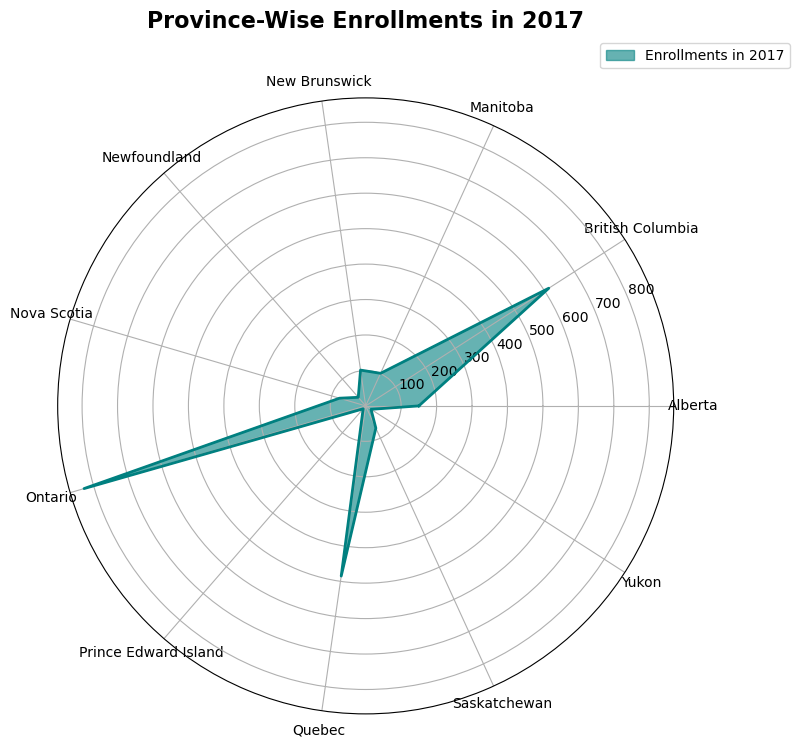

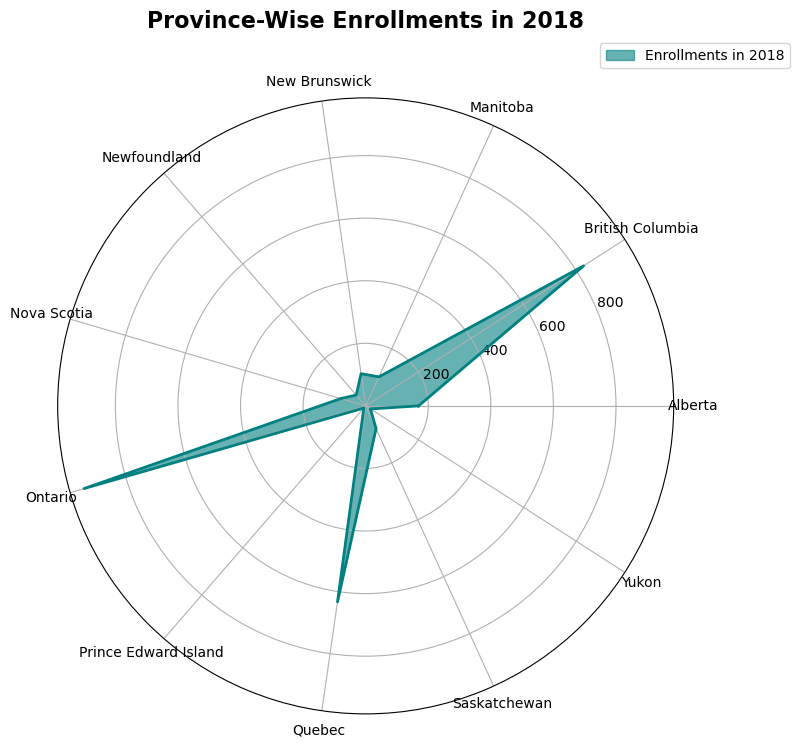

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Load the loyalty history dataset
loyalty_history_path = '/Users/rishipatel/Desktop/Sem-5/DV/Ass-3/Updated_Customer_Loyalty_History.csv'

# Read the dataset
loyalty_history = pd.read_csv(loyalty_history_path)

# Extract year from enrollment date
loyalty_history['Enrollment Year'] = pd.to_datetime(loyalty_history['Enrollment Date']).dt.year

# Define metro and non-metro cities based on the provided list
metro_cities = [
    'Toronto', 'Edmonton', 'Vancouver', 'Montreal', 
    'Quebec City', 'Ottawa', 'Calgary', 'Winnipeg', 
    'Halifax', 'London', 'Victoria'
]

non_metro_cities = [
    'Hull', 'Whitehorse', 'Trenton', 'Dawson Creek', 'Fredericton', 
    'Tremblant', 'Thunder Bay', 'Whistler', 'Peace River', 
    'Sudbury', 'West Vancouver', 'Regina', 'Kelowna', 
    "St. John's", 'Kingston', 'Banff', 'Moncton', 'Charlottetown'
]

# Add a City Tier column
loyalty_history['City Tier'] = loyalty_history['City'].apply(
    lambda x: 'Metro' if x.strip().title() in [city.title() for city in metro_cities] else 
              ('Non-Metro' if x.strip().title() in [city.title() for city in non_metro_cities] else 'Unknown')
)

# Define urban and rural provinces
urban_provinces = ['Ontario', 'British Columbia', 'Quebec', 'Alberta']
rural_provinces = ['Saskatchewan', 'Manitoba', 'Newfoundland', 'Nova Scotia','Yukon','New Brunswick']

# Add a RegionType column
loyalty_history['RegionType'] = loyalty_history['Province'].apply(
    lambda x: 'Urban' if x in urban_provinces else ('Rural' if x in rural_provinces else 'Unknown')
)

province_year_enrollments = loyalty_history.groupby(['Province', 'Enrollment Year'])['Loyalty Number'].count().reset_index()
province_year_enrollments.rename(columns={'Loyalty Number': 'Enrollments'}, inplace=True)

unique_years = province_year_enrollments['Enrollment Year'].unique()

# Create Polar Area Chart for each year
for year in sorted(unique_years):
    # Filter data for the specific year
    year_data = province_year_enrollments[province_year_enrollments['Enrollment Year'] == year]
    provinces = year_data['Province']
    enrollments = year_data['Enrollments']

    # Angles for polar chart
    angles = np.linspace(0, 2 * np.pi, len(provinces), endpoint=False).tolist()
    enrollments = list(enrollments)
    angles += angles[:1]  # Close the circle
    enrollments += enrollments[:1]

    # Polar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
    ax.fill(angles, enrollments, color='teal', alpha=0.6, label=f"Enrollments in {year}")
    ax.plot(angles, enrollments, color='teal', linewidth=2)

    # Add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(provinces, fontsize=10)
    ax.set_title(f"Province-Wise Enrollments in {year}", fontsize=16, fontweight='bold', y=1.1)
    ax.grid(True)
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.show()


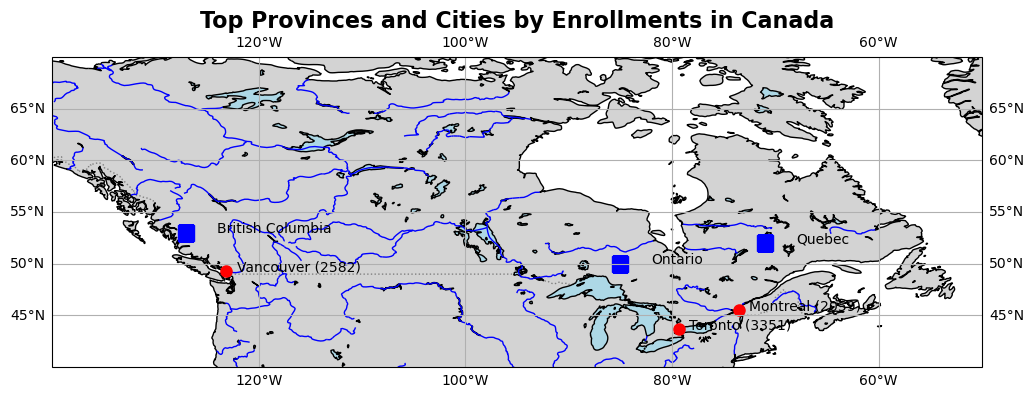

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the loyalty history dataset
loyalty_history_path = '/Users/rishipatel/Desktop/Sem-5/DV/Ass-3/Updated_Customer_Loyalty_History.csv'
loyalty_history = pd.read_csv(loyalty_history_path)

# Extract year from enrollment date
loyalty_history['Enrollment Year'] = pd.to_datetime(loyalty_history['Enrollment Date']).dt.year

# Aggregate enrollments by province
province_totals = loyalty_history.groupby('Province')['Loyalty Number'].count().reset_index()
province_totals.rename(columns={'Loyalty Number': 'Total Enrollments'}, inplace=True)

# Identify the top 3 provinces
top_provinces = province_totals.nlargest(3, 'Total Enrollments')

# Find the top city in each of the top 3 provinces
top_cities = []
for province in top_provinces['Province']:
    city_totals = loyalty_history[loyalty_history['Province'] == province].groupby('City')['Loyalty Number'].count().reset_index()
    city_totals.rename(columns={'Loyalty Number': 'City Enrollments'}, inplace=True)
    top_city = city_totals.nlargest(1, 'City Enrollments')
    top_cities.append((top_city['City'].values[0], province, top_city['City Enrollments'].values[0]))

# Create a DataFrame for the top cities
top_cities_df = pd.DataFrame(top_cities, columns=['City', 'Province', 'City Enrollments'])

# City coordinates (add as needed)
city_coordinates = {
    'Toronto': [43.65107, -79.347015],
    'Vancouver': [49.282729, -123.120738],
    'Montreal': [45.501689, -73.567256],
    # Add coordinates for other cities as needed
}

# Plotting the map using Cartopy
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add geographic features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='lightblue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# Highlight the general area of the top provinces (no province-specific shapes)
top_province_coords = {
    'Ontario': [50.0, -85.0],
    'British Columbia': [53.0, -127.0],
    'Quebec': [52.0, -71.0],
}

for province, (lat, lon) in top_province_coords.items():
    if province in top_provinces['Province'].values:
        ax.plot(lon, lat, marker='s', color='blue', markersize=12, transform=ccrs.PlateCarree())
        ax.text(lon + 3, lat, province, fontsize=10, transform=ccrs.PlateCarree())

# Plot city markers
for _, city in top_cities_df.iterrows():
    city_name = city['City']
    lat, lon = city_coordinates[city_name]
    ax.plot(lon, lat, marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
    ax.text(lon + 1, lat, f"{city_name} ({city['City Enrollments']})", transform=ccrs.PlateCarree(), fontsize=10)

# Set the extent to focus on Canada
ax.set_extent([-140, -50, 40, 70], crs=ccrs.PlateCarree())

# Add title and gridlines
ax.set_title("Top Provinces and Cities by Enrollments in Canada", fontsize=16, weight='bold')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Show the map
plt.show()


In [25]:
%pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [26]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import plotly.express as px

# Load the dataset
loyalty_history_path = '/Users/rishipatel/Desktop/Sem-5/DV/Ass-3/Updated_Customer_Loyalty_History.csv'
loyalty_history = pd.read_csv(loyalty_history_path)

# Extract year from enrollment date
loyalty_history['Enrollment Year'] = pd.to_datetime(loyalty_history['Enrollment Date']).dt.year

# Calculate total enrollments per province
province_totals = loyalty_history.groupby('Province')['Loyalty Number'].count().reset_index()
province_totals.rename(columns={'Loyalty Number': 'Total Enrollments'}, inplace=True)

# Identify the top 3 provinces
top_provinces = province_totals.nlargest(3, 'Total Enrollments')

# Find the top city in each of the top 3 provinces
top_cities = []
for province in top_provinces['Province']:
    city_totals = loyalty_history[loyalty_history['Province'] == province].groupby('City')['Loyalty Number'].count().reset_index()
    city_totals.rename(columns={'Loyalty Number': 'City Enrollments'}, inplace=True)
    top_city = city_totals.nlargest(1, 'City Enrollments')
    top_cities.append((top_city['City'].values[0], province, top_city['City Enrollments'].values[0]))

# Create a DataFrame for the top cities
top_cities_df = pd.DataFrame(top_cities, columns=['City', 'Province', 'City Enrollments'])

# Display the top cities and provinces
print("Top Provinces and Cities:")
print(top_cities_df)

# Coordinates for visualization (for simplicity, add these manually or use geocoding APIs)
province_coordinates = {
    'Ontario': [51.2538, -85.3232],
    'British Columbia': [53.7267, -127.6476],
    'Quebec': [52.9399, -73.5491],
    # Add coordinates for other provinces as needed
}

city_coordinates = {
    'Toronto': [43.65107, -79.347015],
    'Vancouver': [49.282729, -123.120738],
    'Montreal': [45.501689, -73.567256],
    # Add coordinates for other cities as needed
}

# Add coordinates to the DataFrame
top_cities_df['City Latitude'] = top_cities_df['City'].map(lambda x: city_coordinates[x][0])
top_cities_df['City Longitude'] = top_cities_df['City'].map(lambda x: city_coordinates[x][1])
top_provinces['Latitude'] = top_provinces['Province'].map(lambda x: province_coordinates[x][0])
top_provinces['Longitude'] = top_provinces['Province'].map(lambda x: province_coordinates[x][1])

# Create the map using plotly
fig = px.scatter_mapbox(
    top_cities_df,
    lat='City Latitude',
    lon='City Longitude',
    text='City',
    size='City Enrollments',
    hover_name='City',
    hover_data={'Province': True, 'City Enrollments': True},
    title="Top Cities in Top Provinces by Enrollments",
    mapbox_style='carto-positron',
    zoom=3
)

# Add markers for provinces
for _, row in top_provinces.iterrows():
    fig.add_scattermapbox(
        lat=[row['Latitude']],
        lon=[row['Longitude']],
        mode='markers+text',
        text=row['Province'],
        marker=dict(size=10, color='red'),
        name=f"{row['Province']} (Province)"
    )

fig.show(renderer="browser")



Top Provinces and Cities:
        City          Province  City Enrollments
0    Toronto           Ontario              3351
1  Vancouver  British Columbia              2582
2   Montreal            Quebec              2059


In [28]:
%pip install nbformat


Note: you may need to restart the kernel to use updated packages.


In [29]:
%pip install nbformat plotly


Note: you may need to restart the kernel to use updated packages.


In [30]:
%pip install notebook jupyter matplotlib



Note: you may need to restart the kernel to use updated packages.


In [31]:
%pip install cartopy


Note: you may need to restart the kernel to use updated packages.
